I've been comparing the clustering of galaxy catalogs generated using HOD of the standard and high resolution halo catalogs in order to determine the fiducial HOD parameters and the step sizes for the derivatives. However, I never stopped to wonder whther the halo clustering is different between the two resolutions for different halo mass limits...

In [1]:
import os 
import scipy as sp 
import numpy as np 
# --- eMaNu --- 
from emanu import util as UT
from emanu import forwardmodel as FM
from emanu.sims import data as simData
# -- pyspectrum -- 
from pyspectrum import pyspectrum as pySpec
# --- corrfunc -- 
from Corrfunc.theory import wp as wpCF

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import StrMethodFormatter, NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline 

In [3]:
# halo catalogs 
halos = simData.hqHalos('/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1', 4)
Mh_min = np.log10(np.array(halos['Mass']).min()) 
print('log(Mh_min) = %f' % Mh_min)
# hi res halo catalog
halos_hires = simData.hqHalos('/Users/ChangHoon/data/emanu/halos/hades/0.0eV/1_hires', 4)

log(Mh_min) = 13.118305


In [4]:
_pos_lr = np.array(halos['Position'])
_pos_hr = np.array(halos_hires['Position'])

In [5]:
# impose halo mass limit
mlim_lr = (np.array(halos['Mass']) >= 10**14)
mlim_hr = (np.array(halos_hires['Mass']) >= 10**14)

pos_lr = _pos_lr[mlim_lr,:]
pos_hr = _pos_hr[mlim_hr,:]

In [6]:
# lets check out their real-space projected clustering
rbins = np.array([0.1, 0.15848932, 0.25118864, 0.39810717, 0.63095734, 1., 1.58489319, 2.51188643, 3.98107171, 6.30957344, 10., 15.84893192, 25.11886432]) 
wp_lr = wpCF(1000., 40., 1, rbins, pos_lr[:,0], pos_lr[:,1], pos_lr[:,2], verbose=False, output_rpavg=False) 
wp_hr = wpCF(1000., 40., 1, rbins, pos_hr[:,0], pos_hr[:,1], pos_hr[:,2], verbose=False, output_rpavg=False) 

(0.5, 1.5)

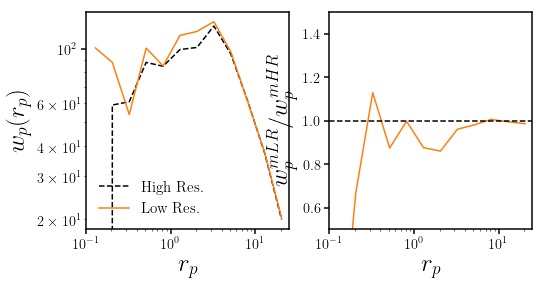

In [11]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.plot(0.5*(rbins[1:] + rbins[:-1]), wp_hr['wp'], c='k', ls='--', label='High Res.')
sub.plot(0.5*(rbins[1:] + rbins[:-1]), wp_lr['wp'], c='C1', label='Low Res.')
sub.set_xlabel('$r_p$', fontsize=25) 
sub.set_ylabel('$w_p(r_p)$', fontsize=25) 
sub.set_xscale('log') 
sub.set_xlim(1e-1, 25) 
sub.set_yscale('log') 
#sub.set_ylim(1e1, 1e2) 
sub.legend(loc='lower left', fontsize=15)
sub = fig.add_subplot(122)
sub.plot(0.5*(rbins[1:] + rbins[:-1]), wp_hr['wp']/wp_lr['wp'], c='C1')
sub.plot([1e-1, 25], [1., 1.], c='k', ls='--')
sub.set_xlabel('$r_p$', fontsize=25) 
sub.set_ylabel('$w_p^{\rm LR}/w_p^{\rm HR}$', fontsize=25) 
sub.set_xscale('log') 
sub.set_xlim(1e-1, 25) 
sub.set_ylim(0.5, 1.5)

In [8]:
pk_lr = pySpec.Pk_periodic(pos_lr.T, Lbox=1000, Ngrid=360, fft='pyfftw', silent=True)
pk_hr = pySpec.Pk_periodic(pos_hr.T, Lbox=1000, Ngrid=360, fft='pyfftw', silent=True)

(0.5, 1.5)

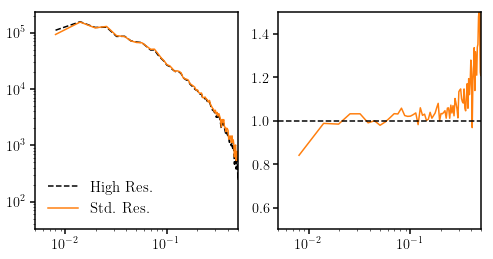

In [10]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.plot(pk_hr['k'], pk_hr['p0k'], c='k', ls='--', label='High Res.' )
sub.plot(pk_lr['k'], pk_lr['p0k'], c='C1', label='Std. Res.')
sub.set_xscale('log') 
sub.set_xlim(5e-3, 0.5) 
sub.set_yscale('log') 
#sub.set_ylim(5e2, 6e4) 
sub.legend(loc='lower left', fontsize=15)
sub = fig.add_subplot(122)
sub.plot(pk_hr['k'], pk_lr['p0k']/pk_hr['p0k'], c='C1')
sub.plot([5e-3, 0.5], [1., 1.], c='k', ls='--')
sub.set_xscale('log') 
sub.set_xlim(5e-3, 0.5) 
sub.set_ylim(0.5, 1.5)

The halo clustering is significantly different between the halo catalogs of the two resolutions for a given halo mass limit. This suggests that the detailed comparison I've been doing of the galaxy clustering was a bit meaningless. As long as the halo occupation below the halo mass limit is minimal, we're good!